In [216]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import preprocessing
from sklearn import metrics 
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
import seaborn as sns
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [218]:
data = pd.read_csv('./project_data_user_count_30.csv',header=0)
data=data.dropna()

#data columns
data=data.iloc[:,1:12].join(data.iloc[:,-1]) #without genre
data=data.drop("genres", axis=1)
data.loc[data['average_user_rating']>=3.5, 'average_user_rating']=1
data.loc[data['average_user_rating']!=1, 'average_user_rating']=0

data_X=data.drop('average_user_rating',axis=1)
data_y=data.loc[:,data.columns=='average_user_rating']

data_X[['user_rating_count','age_rating','language_sum','size','release_date','last_update','supported_devices']]=StandardScaler().fit_transform(data_X[['user_rating_count','age_rating','language_sum','size','release_date','last_update','supported_devices']])

os=SMOTE(random_state=0)
X_train, X_test, y_train, y_test=train_test_split(data_X, data_y, test_size=0.3, random_state=0)
columns=X_train.columns

X_train,y_train=os.fit_sample(X_train, y_train.to_numpy().ravel())
X_train = pd.DataFrame(data=X_train,columns=columns )
y_train= pd.DataFrame(data=y_train,columns=['average_user_rating'])

y_train.average_user_rating.value_counts()





1    3920
0    3920
Name: average_user_rating, dtype: int64

In [224]:
LinearModel = LinearRegression()
LinearModel.fit(X_train, y_train)#Linear model
y_pred = LinearModel.predict(X_test)

print(LinearModel.score(X_test,y_test))
print(LinearModel.score(X_train,y_train))

LR_mae = metrics.mean_absolute_error(y_test, y_pred)
LR_mse = metrics.mean_squared_error(y_test, y_pred)
LR_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', LR_mae)  
print('Mean Squared Error:', LR_mse)  
print('Root Mean Squared Error:', LR_rmse)

-2.4982581586894166
0.2090459745604183
Mean Absolute Error: 0.40730062993244853
Mean Squared Error: 0.20025991192836304
Root Mean Squared Error: 0.4475040915213659


In [225]:
lasso_model = Lasso(alpha = 0.002)
lasso_model.fit(X_train,y_train) #Lasso model
y_pred_lasso = lasso_model.predict(X_test)

print(lasso_model.score(X_test,y_test))
print(lasso_model.score(X_train,y_train))

Lasso_mae = metrics.mean_absolute_error(y_test, y_pred_lasso)
Lasso_mse = metrics.mean_squared_error(y_test, y_pred_lasso)
Lasso_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))

print('Mean Absolute Error:', Lasso_mae)  
print('Mean Squared Error:', Lasso_mse)  
print('Root Mean Squared Error:', Lasso_rmse)

-2.4999588924824145
0.2086392347279209
Mean Absolute Error: 0.4089062278687292
Mean Squared Error: 0.2003572714667817
Root Mean Squared Error: 0.4476128589158065


In [226]:
ridge_model = Ridge(alpha = 0.002)
ridge_model.fit(X_train,y_train) #Ridge model
y_pred_ridge = ridge_model.predict(X_test)

print(ridge_model.score(X_test,y_test))
print(ridge_model.score(X_train,y_train))

Ridge_mae = metrics.mean_absolute_error(y_test, y_pred_ridge)
Ridge_mse = metrics.mean_squared_error(y_test, y_pred_ridge)
Ridge_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge))

print('Mean Absolute Error:', Ridge_mae)  
print('Mean Squared Error:', Ridge_mse)  
print('Root Mean Squared Error:', Ridge_rmse)

-2.49825818357451
0.20904597456025997
Mean Absolute Error: 0.40730066596728975
Mean Squared Error: 0.2002599133529253
Root Mean Squared Error: 0.44750409311304107


In [227]:
ElasticNet_model = ElasticNet(alpha = 0.002,l1_ratio=0.5)
ElasticNet_model.fit(X_train,y_train) 
y_pred_elastic = ElasticNet_model.predict(X_test)

print(ElasticNet_model.score(X_test,y_test))
print(ElasticNet_model.score(X_train,y_train))

ElasticNet_mae = metrics.mean_absolute_error(y_test, y_pred_elastic)
ElasticNet_mse = metrics.mean_squared_error(y_test, y_pred_elastic)
ElasticNet_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_elastic))

print('Mean Absolute Error:', ElasticNet_mae)  
print('Mean Squared Error:', ElasticNet_mse)  
print('Root Mean Squared Error:', ElasticNet_rmse)

-2.5018918972530138
0.20875924774278332
Mean Absolute Error: 0.40836751849706454
Mean Squared Error: 0.20046792749831438
Root Mean Squared Error: 0.4477364487042733


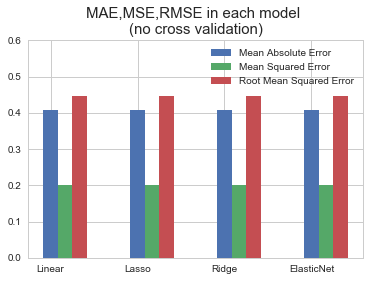

In [267]:
models = ['Linear', 'Lasso', 'Ridge', 'ElasticNet']
MAEvalues = [LR_mae, Lasso_mae, Ridge_mae, ElasticNet_mae]
MSEvalues = [LR_mse, Lasso_mse, Ridge_mse, ElasticNet_mse]
RMSEvalues = [LR_rmse, Lasso_rmse, Ridge_rmse, ElasticNet_rmse]

# plt.bar(models,values,align='center') # A bar chart
# plt.xlabel('models')
# plt.ylabel('MSE')

# plt.show()

size = 4
x = np.arange(size)
a = np.random.random(size)
b = np.random.random(size)
c = np.random.random(size)

total_width, n = 0.5, 3
width = total_width / n
x = x - (total_width - width) / 2

plt.bar(x, MAEvalues,  width=width, label='Mean Absolute Error')
plt.bar(x + width, MSEvalues, width=width, label='Mean Squared Error')
plt.bar(x + 2 * width, RMSEvalues, width=width, label='Root Mean Squared Error')
plt.xticks(x, models, size='small')
plt.ylim(0, 0.6)
plt.title('MAE,MSE,RMSE in each model \n(no cross validation)',fontsize=15)
plt.legend()
plt.savefig('MAE,MSE,RMSE in each model(no cross validation).png')
plt.show()


In [260]:
LinearModelForCV = LinearRegression()
LR_MAEscores = cross_val_score(LinearModelForCV, data_X, data_y, cv=10,scoring='neg_mean_absolute_error')
LR_MSEscores = cross_val_score(LinearModelForCV, data_X, data_y, cv=10,scoring='neg_mean_squared_error')
LR_RMSEscores = cross_val_score(LinearModelForCV, data_X, data_y, cv=10,scoring='neg_root_mean_squared_error')

LassoModelForCV = Lasso(alpha = 0.002)
Lasso_MAEscores = cross_val_score(LassoModelForCV, data_X, data_y, cv=10,scoring='neg_mean_absolute_error')
Lasso_MSEscores = cross_val_score(LassoModelForCV, data_X, data_y, cv=10,scoring='neg_mean_squared_error')
Lasso_RMSEscores = cross_val_score(LassoModelForCV, data_X, data_y, cv=10,scoring='neg_root_mean_squared_error')

RidgeModelForCV = Ridge(alpha = 0.002)
Ridge_MAEscores = cross_val_score(RidgeModelForCV, data_X, data_y, cv=10,scoring='neg_mean_absolute_error')
Ridge_MSEscores = cross_val_score(RidgeModelForCV, data_X, data_y, cv=10,scoring='neg_mean_squared_error')
Ridge_RMSEscores = cross_val_score(RidgeModelForCV, data_X, data_y, cv=10,scoring='neg_root_mean_squared_error')

ElasticNetModelForCV = ElasticNet(alpha = 0.002,l1_ratio=0.5)
ElasticNet_MAEscores = cross_val_score(ElasticNetModelForCV, data_X, data_y, cv=10,scoring='neg_mean_absolute_error')
ElasticNet_MSEscores = cross_val_score(ElasticNetModelForCV, data_X, data_y, cv=10,scoring='neg_mean_squared_error')
ElasticNet_RMSEscores = cross_val_score(ElasticNetModelForCV, data_X, data_y, cv=10,scoring='neg_root_mean_squared_error')

print(LR_MAEscores.mean())
print(LR_MSEscores.mean())
print(LR_RMSEscores.mean())
print(Lasso_MAEscores.mean())
print(Lasso_MSEscores.mean())
print(Lasso_RMSEscores.mean())
print(Ridge_MAEscores.mean())
print(Ridge_MSEscores.mean())
print(Ridge_RMSEscores.mean())
print(ElasticNet_MAEscores.mean())
print(ElasticNet_MSEscores.mean())
print(ElasticNet_RMSEscores.mean())


-0.1092445725324332
-0.056496341164542066
-0.2282737810562992
-0.10853748530214147
-0.05631055334472331
-0.22781310889089249
-0.10924456344849764
-0.0564963393942016
-0.22827377557730424
-0.10878847806295915
-0.05638052135806406
-0.2279878423244806


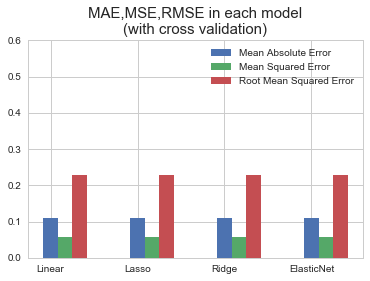

In [266]:
models = ['Linear', 'Lasso', 'Ridge', 'ElasticNet']
MAEvalues = [-LR_MAEscores.mean(), -Lasso_MAEscores.mean(), -Ridge_MAEscores.mean(), -ElasticNet_MAEscores.mean()]
MSEvalues = [-LR_MSEscores.mean(), -Lasso_MSEscores.mean(), -Ridge_MSEscores.mean(), -ElasticNet_MSEscores.mean()]
RMSEvalues = [-LR_RMSEscores.mean(), -Lasso_RMSEscores.mean(), -Ridge_RMSEscores.mean(), -ElasticNet_RMSEscores.mean()]

# plt.bar(models,values,align='center') # A bar chart
# plt.xlabel('models')
# plt.ylabel('MSE')

# plt.show()

size = 4
x = np.arange(size)
a = np.random.random(size)
b = np.random.random(size)
c = np.random.random(size)

total_width, n = 0.5, 3
width = total_width / n
x = x - (total_width - width) / 2

plt.bar(x, MAEvalues,  width=width, label='Mean Absolute Error')
plt.bar(x + width, MSEvalues, width=width, label='Mean Squared Error')
plt.bar(x + 2 * width, RMSEvalues, width=width, label='Root Mean Squared Error')
plt.xticks(x, models, size='small')
plt.ylim(0, 0.6)
plt.title('MAE,MSE,RMSE in each model\n(with cross validation)',fontsize=15)
plt.legend()
plt.savefig('MAE,MSE,RMSE in each model(cross validation).png')
plt.show()